In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import platform
from IPython.display import Image

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 700)
pd.set_option("precision", 2)

In [2]:
TotCost_Method = ('SwolfPy_Total_Cost', 'SwolfPy')
OptCost_Method = ('SwolfPy_Operational_Cost', 'SwolfPy')
CapCost_Method = ('SwolfPy_Capital_Cost', 'SwolfPy')
GWP_Method = ('IPCC 2013, Ecoinvent V3.5', 'climate change', 'GWP 100a, bioCO2=1, C1_36')
CED_Method = ('cumulative energy demand', 'fossil', 'non-renewable energy resources, fossil')
ACID_Method = ('TRACI (2.1) SwolfPy', 'environmental impact', 'acidification')
ETP_Method = ('TRACI (2.1) SwolfPy', 'environmental impact', 'eutrophication')
SMOG_Method = ('TRACI (2.1) SwolfPy', 'environmental impact', 'photochemical smog')
ETOX_Method = ('USEtox (obsolete)', 'ecotoxicity', 'total')
HTOX_Method = ('USEtox (obsolete)', 'human toxicity', 'total')

methods = [TotCost_Method, OptCost_Method, CapCost_Method, GWP_Method,
           CED_Method, ACID_Method, ETP_Method, SMOG_Method, ETOX_Method,
           HTOX_Method]

methods_main = [TotCost_Method, GWP_Method,
           CED_Method, ACID_Method, ETP_Method, SMOG_Method, ETOX_Method,
           HTOX_Method]


In [3]:
[f for f in os.listdir() if '.pickle' in str(f)]

['MC MinGHG results.pickle',
 'MC MinGHG-SO results.pickle',
 'MC MinGHG-NoGC-AnF results.pickle',
 'MC MinGHG-NoGC-AnF-SO results.pickle']

In [4]:
files = [
    'MC MinGHG results.pickle',
    'MC MinGHG-SO results.pickle',
    'MC MinGHG-NoGC-AnF results.pickle',
    'MC MinGHG-NoGC-AnF-SO results.pickle',
    'MC MinCost results.pickle',
    'MC MinCost-SO results.pickle']

In [5]:
for f in files:
    print(f[3:-15])

MinGHG
MinGHG-SO
MinGHG-NoGC-AnF
MinGHG-NoGC-AnF-SO
MinCost
MinCost-SO


In [6]:
scenario_dict = {
'MinGHG': 'MinGHG',
'MinGHG-SO':'MinGHG-SO',
'MinGHG-NoGC-AnF':'MinGHG-NoGC&AnF',
'MinGHG-NoGC-AnF-SO':'MinGHG-NoGC&AnF-SO',
'MinCost':'MinCost',
'MinCost-SO':'MinCost-SO'}

In [7]:
MinGHG = pd.read_pickle('MC MinGHG results.pickle')
MinGHG.iloc[:, :10] /= 461395.22
MinGHG_SO = pd.read_pickle('MC MinGHG-SO results.pickle')
MinGHG_SO.iloc[:, :10] /= 461395.22

MinGHG_NoG_AnF = pd.read_pickle('MC MinGHG-NoGC-AnF results.pickle')
MinGHG_NoG_AnF.iloc[:, :10] /= 461395.22
MinGHG_NoG_AnF_SO = pd.read_pickle('MC MinGHG-NoGC-AnF-SO results.pickle')
MinGHG_NoG_AnF_SO.iloc[:, :10] /= 461395.22

In [8]:
MinGHG.head()

,"(SwolfPy_Total_Cost, SwolfPy)","(SwolfPy_Operational_Cost, SwolfPy)","(SwolfPy_Capital_Cost, SwolfPy)","(IPCC 2013, Ecoinvent V3.5, climate change, GWP 100a, bioCO2=1, C1_36)","(cumulative energy demand, fossil, non-renewable energy resources, fossil)","(TRACI (2.1) SwolfPy, environmental impact, acidification)","(TRACI (2.1) SwolfPy, environmental impact, eutrophication)","(TRACI (2.1) SwolfPy, environmental impact, photochemical smog)","(USEtox (obsolete), ecotoxicity, total)","(USEtox (obsolete), human toxicity, total)","(LF, Landfill operation parameteres, annWaste)","(LF, Landfill operation parameteres, optime)","(LF, Landfill Gas Parameters, actk)","(LF, Landfill Gas Parameters, initColEff)","(LF, Landfill Gas Parameters, intColEff)","(LF, Landfill Gas Parameters, incColEff)","(LF, Landfill Gas Parameters, finColEff)","(LF, Energy_Rec, convEff)","(LF, Operational_Cost, Yard_Trimmings_Leaves)","(LF, Operational_Cost, Yard_Trimmings_Grass)","(LF, Operational_Cost, Yard_Trimmings_Branches)","(LF, Operational_Cost, Food_Waste_Vegetable)","(LF, Operational_Cost, Food_Waste_Non_Vegetable)","(LF, Operational_Cost, Wood)","(LF, Operational_Cost, Wood_Other)","(LF, Operational_Cost, Textiles)","(LF, Operational_Cost, Rubber_Leather)","(LF, Operational_Cost, Newsprint)","(LF, Operational_Cost, Corr_Cardboard)","(LF, Operational_Cost, Office_Paper)","(LF, Operational_Cost, Magazines)","(LF, Operational_Cost, Third_Class_Mail)","(LF, Operational_Cost, Folding_Containers)","(LF, Operational_Cost, Paper_Bags)","(LF, Operational_Cost, Mixed_Paper)","(LF, Operational_Cost, Paper_Non_recyclable)","(LF, Operational_Cost, HDPE_Translucent_Containers)","(LF, Operational_Cost, HDPE_Pigmented_Containers)","(LF, Operational_Cost, PET_Containers)","(LF, Operational_Cost, Plastic_Other_1_Polypropylene)","(LF, Operational_Cost, Plastic_Other_2)","(LF, Operational_Cost, Mixed_Plastic)","(LF, Operational_Cost, Plastic_Film)","(LF, Operational_Cost, Plastic_Non_Recyclable)","(LF, Operational_Cost, Ferrous_Cans)","(LF, Operational_Cost, Ferrous_Metal_Other)","(LF, Operational_Cost, Aluminum_Cans)","(LF, Operational_Cost, Aluminum_Foil)","(LF, Operational_Cost, Aluminum_Other)","(LF, Operational_Cost, Ferrous_Non_recyclable)","(LF, Operational_Cost, Al_Non_recyclable)","(LF, Operational_Cost, Glass_Brown)","(LF, Operational_Cost, Glass_Green)","(LF, Operational_Cost, Glass_Clear)","(LF, Operational_Cost, Mixed_Glass)","(LF, Operational_Cost, Glass_Non_recyclable)","(LF, Operational_Cost, Misc_Organic)","(LF, Operational_Cost, Misc_Inorganic)","(LF, Operational_Cost, E_waste)","(LF, Operational_Cost, Bottom_Ash)","(LF, Operational_Cost, Fly_Ash)","(LF, Operational_Cost, Diapers_and_sanitary_products)","(Composting, Material_Properties, densFC)","(Composting, Economic_parameters, Unit_capital_cost)","(Composting, Operational_Cost, Yard_Trimmings_Leaves)","(Composting, Operational_Cost, Yard_Trimmings_Grass)","(Composting, Operational_Cost, Yard_Trimmings_Branches)","(Composting, Operational_Cost, Food_Waste_Vegetable)","(Composting, Operational_Cost, Food_Waste_Non_Vegetable)","(Composting, Operational_Cost, Wood)","(Composting, Operational_Cost, Wood_Other)","(Composting, Operational_Cost, Textiles)","(Composting, Operational_Cost, Rubber_Leather)","(Composting, Operational_Cost, Newsprint)","(Composting, Operational_Cost, Corr_Cardboard)","(Composting, Operational_Cost, Office_Paper)","(Composting, Operational_Cost, Magazines)","(Composting, Operational_Cost, Third_Class_Mail)","(Composting, Operational_Cost, Folding_Containers)","(Composting, Operational_Cost, Paper_Bags)","(Composting, Operational_Cost, Mixed_Paper)","(Composting, Operational_Cost, Paper_Non_recyclable)","(Composting, Operational_Cost, HDPE_Translucent_Containers)","(Composting, Operational_Cost, HDPE_Pigmented_Containers)","(Composting, Operational_Cost, PET_Containers)","(Composting, Operational_Cost, Plastic_Other_1_Polypropylene)","(Composting, Operational_Cost, Plastic_Other_

In [9]:
def map_eff(x):
    if 0.05 <= x < 0.10:
        return "5-10%"
    elif 0.10 <= x <0.15:
        return "10-15%"
    elif 0.15 <= x <0.20:
        return "15-20%"
    elif 0.2 <= x <0.25:
        return "20-25%"
    elif 0.25 <= x <0.3:
        return "25-30%"
    elif 0.3 <= x <0.35:
        return "30-35%"
    elif 0.35 <= x <0.40:
        return "35-40%"
    elif 0.40 <= x <0.45:
        return "40-45%" 

In [10]:
MinGHG['GC Elec. Prod. Eff.'] = MinGHG[('Gasification Syngas Combustion', 'Energy', 'elec_gen_eff_HP')].map(map_eff)
MinGHG['Scenario'] = 'MinGHG'
MinGHG_SO['GC Elec. Prod. Eff.'] = MinGHG_SO[('Gasification Syngas Combustion', 'Energy', 'elec_gen_eff_HP')].map(map_eff)
MinGHG_SO['Scenario'] = 'MinGHG-SO'

columns = ['GC Elec. Prod. Eff.', 'Scenario',
           ('Gasification Syngas Combustion', 'Energy', 'elec_gen_eff_HP'),
           ('IPCC 2013, Ecoinvent V3.5', 'climate change', 'GWP 100a, bioCO2=1, C1_36')]

data = pd.concat([MinGHG.loc[:, columns], MinGHG_SO.loc[:, columns]])

c:\users\msardar2\.conda\envs\dev\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [11]:
data.head()

,GC Elec. Prod. Eff.,Scenario,"(Gasification Syngas Combustion, Energy, elec_gen_eff_HP)","(IPCC 2013, Ecoinvent V3.5, climate change, GWP 100a, bioCO2=1, C1_36)"
0,25-30%,MinGHG,0.28,154.06
1,30-35%,MinGHG,0.35,120.58
2,10-15%,MinGHG,0.12,396.39
3,40-45%,MinGHG,0.41,12.28
4,40-45%,MinGHG,0.43,-5.66


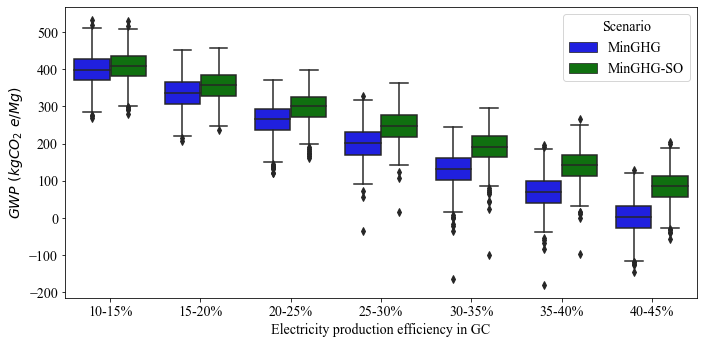

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
sns.boxplot(data=data.sort_values(by='GC Elec. Prod. Eff.'),
            x='GC Elec. Prod. Eff.',
            y=('IPCC 2013, Ecoinvent V3.5', 'climate change', 'GWP 100a, bioCO2=1, C1_36'),
           ax=ax,
           hue='Scenario',
           palette={'MinGHG-SO':'g', 'MinGHG': 'b'})

ax.set_ylabel(r'$GWP\ (kgCO_2\ e/Mg)$')
ax.set_xlabel("Electricity production efficiency in GC")
fig.tight_layout()
fig.savefig('GC_Elec.png', dpi=300)

In [13]:
MinGHG_NoG_AnF['WTE Elec. Prod. Eff.'] = MinGHG_NoG_AnF[('WTE', 'Elec_Prod_Eff', 'Gross_Efficiency')].map(map_eff)
MinGHG_NoG_AnF['Scenario'] = 'MinGHG-NoGC&AnF'
MinGHG_NoG_AnF_SO['WTE Elec. Prod. Eff.'] = MinGHG_NoG_AnF_SO[('WTE', 'Elec_Prod_Eff', 'Gross_Efficiency')].map(map_eff)
MinGHG_NoG_AnF_SO['Scenario'] = 'MinGHG-NoGC&AnF-SO'

columns = ['WTE Elec. Prod. Eff.', 'Scenario',
           ('WTE', 'Elec_Prod_Eff', 'Gross_Efficiency'),
           ('IPCC 2013, Ecoinvent V3.5', 'climate change', 'GWP 100a, bioCO2=1, C1_36')]

data_1 = pd.concat([MinGHG_NoG_AnF.loc[:, columns], MinGHG_NoG_AnF_SO.loc[:, columns]])

c:\users\msardar2\.conda\envs\dev\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


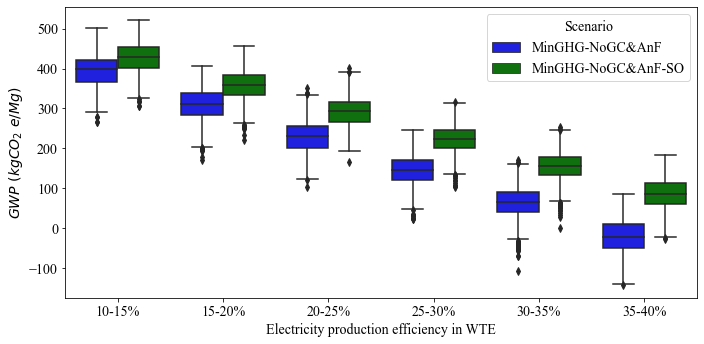

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
sns.boxplot(data=data_1.sort_values(by=['WTE Elec. Prod. Eff.', 'Scenario']),
            x='WTE Elec. Prod. Eff.',
            y=('IPCC 2013, Ecoinvent V3.5', 'climate change', 'GWP 100a, bioCO2=1, C1_36'),
           ax=ax,
           hue='Scenario',
           palette={'MinGHG-NoGC&AnF-SO':'g', 'MinGHG-NoGC&AnF': 'b'})

ax.set_ylabel(r'$GWP\ (kgCO_2\ e/Mg)$')
ax.set_xlabel("Electricity production efficiency in WTE")
fig.tight_layout()
fig.savefig('WTE_Elec.png', dpi=300)